Epoch 1/7


 32/350 [=>............................] - ETA: 5s - loss: 3.8211 - acc: 0.5625

350/350 [==============================] - 1s 2ms/step - loss: 3.4646 - acc: 0.4457


Epoch 2/7
 32/350 [=>............................] - ETA: 0s - loss: 1.7058 - acc: 0.5312

350/350 [==============================] - 0s 91us/step - loss: 2.3763 - acc: 0.4457


Epoch 3/7
 32/350 [=>............................] - ETA: 0s - loss: 1.4201 - acc: 0.6562

350/350 [==============================] - 0s 74us/step - loss: 1.5928 - acc: 0.4457


Epoch 4/7
 32/350 [=>............................] - ETA: 0s - loss: 1.3249 - acc: 0.3438

350/350 [==============================] - 0s 71us/step - loss: 1.3118 - acc: 0.3314


Epoch 5/7
 32/350 [=>............................] - ETA: 0s - loss: 1.2733 - acc: 0.3125

350/350 [==============================] - 0s 63us/step - loss: 1.2368 - acc: 0.2971


Epoch 6/7
 32/350 [=>............................] - ETA: 0s - loss: 1.2189 - acc: 0.3125

350/350 [==============================] - 0s 66us/step - loss: 1.1535 - acc: 0.3543


Epoch 7/7
 32/350 [=>............................] - ETA: 0s - loss: 1.1303 - acc: 0.2812



350/350 [==============================] - 0s 66us/step - loss: 1.1204 - acc: 0.3629


30/30 [==============================] - 0s 3ms/step


Test accuracy: 0.36666667461395264


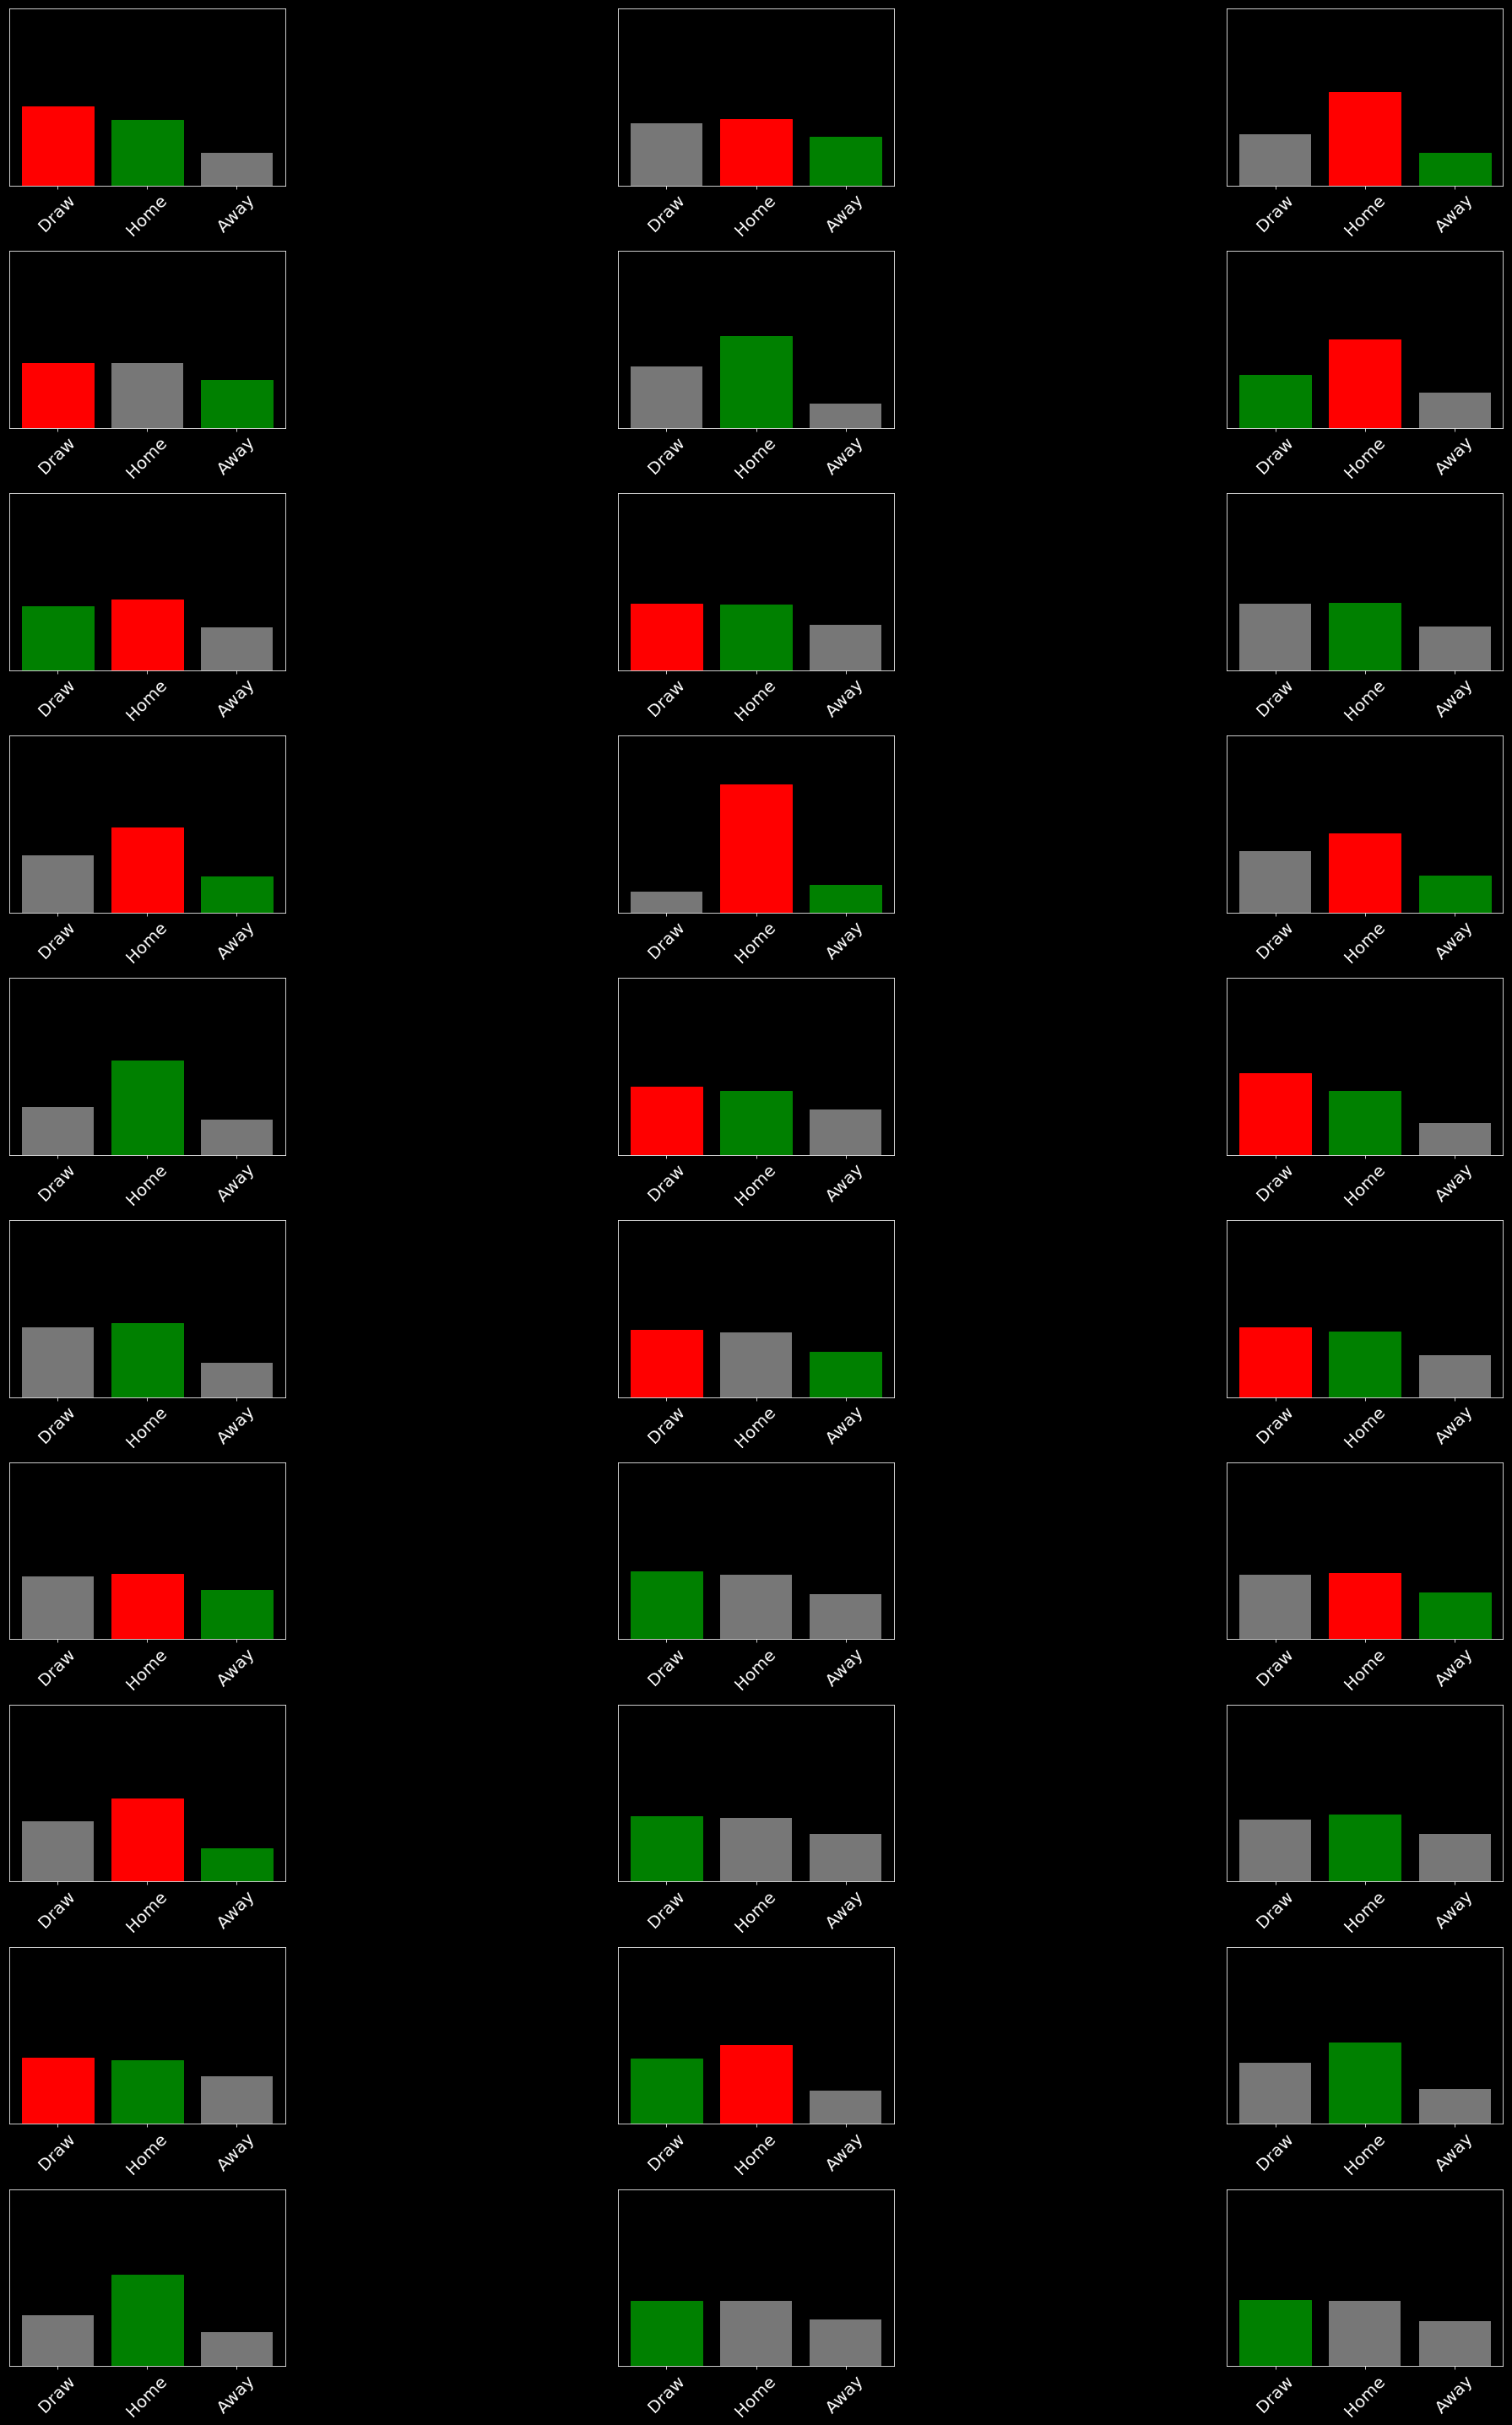

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

data = pd.read_csv('inputdata.csv')
inputData = data.iloc[:, 0:21]
inputData = inputData.values
inputData = shuffle(inputData)
trainData = inputData[:350, :]
outputData = data.iloc[:,21].values
outputData = shuffle(outputData)
testData = inputData[350:, :]

def map_result_to_output(x):
    outputData = np.empty([x.shape[0], 1])
    for i in range(x.shape[0]):
        outputData[i] = x[i]
    return outputData

outputData = map_result_to_output(data.iloc[:trainData.shape[0], 21])
outputTestData = map_result_to_output(data.iloc[:testData.shape[0], 21])

model = keras.Sequential([
    keras.layers.Dense(15, activation=tf.nn.relu, input_shape=(trainData.shape[1],)),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(trainData, outputData, epochs=7)

test_loss, test_acc = model.evaluate(testData, outputTestData)

print('Test accuracy:', test_acc)

predictions = model.predict(testData)

# for i in range(predictions.shape[0]):
#     print((predictions[i]))
#     print(outputTestData[i])

def plot_results(i, predictions, label):
  outputNames = ['Draw', 'Home', 'Away']
  predictions, label = predictions[i], label[i]
  plt.grid(False)
  plt.xticks(range(3), outputNames, rotation=45, fontsize = 20)
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions)
  thisplot[predicted_label].set_color('red')
  thisplot[int(label[0])].set_color('green')


num_rows = 10
num_cols = 3
num_plots = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 4*num_rows))

for i in range(predictions.shape[0]):
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.tight_layout()
    plot_results(i, predictions, outputTestData)